# Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of input variables (features) in a dataset. It helps mitigate issues related to the "curse of dimensionality" and improves the performance of machine learning models, especially for high-dimensional data.

---

## Table of Contents

1. [Introduction to Dimensionality Reduction](#1-introduction-to-dimensionality-reduction)
2. [Principal Component Analysis (PCA)](#2-principal-component-analysis-pca)
3. [t-Distributed Stochastic Neighbor Embedding (t-SNE)](#3-t-sne)
4. [Linear Discriminant Analysis (LDA)](#4-linear-discriminant-analysis-lda)
5. [Feature Importance for Dimensionality Reduction](#5-feature-importance-for-dimensionality-reduction)

---

## 1. Introduction to Dimensionality Reduction

Dimensionality reduction techniques reduce the complexity of a dataset by reducing the number of features while retaining the dataset's structure and relationships. This leads to faster computation, better model performance, and sometimes even increased accuracy.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("categorical_data.csv")
data.drop(columns=["ID"],inplace=True)
num_col = data.select_dtypes(include=["int64","float64"]).columns.tolist()

data.head()

,Product_Name,Category,Region,Price,Sales,Discount_Percentage,Customer_Rating
0,Product_1,Furniture,South,870.28,6451,13.86,4.5
1,Product_2,Books,South,525.13,7745,39.55,3.6
2,Product_3,Furniture,West,809.60,8295,43.45,2.6
3,Product_4,Books,South,953.33,7416,49.26,1.9
4,Product_5,Food,North,363.77,9391,19.13,2.0


## 2. Principal Component Analysis (PCA)

PCA is a widely-used technique for dimensionality reduction. It transforms the data into a new coordinate system by identifying the directions (principal components) along which the variance of the data is maximized.

In [7]:
from sklearn.decomposition import PCA

data = data[num_col]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=["Sales"])) # Target is Sales

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data,columns=["PC1","PC2"])
print("Explained variance ratio by PCA components:\n", pca.explained_variance_ratio_)

Explained variance ratio by PCA components:
 [0.39209521 0.33409984]


PCA is useful when you want to reduce dimensionality while preserving as much variance as possible.

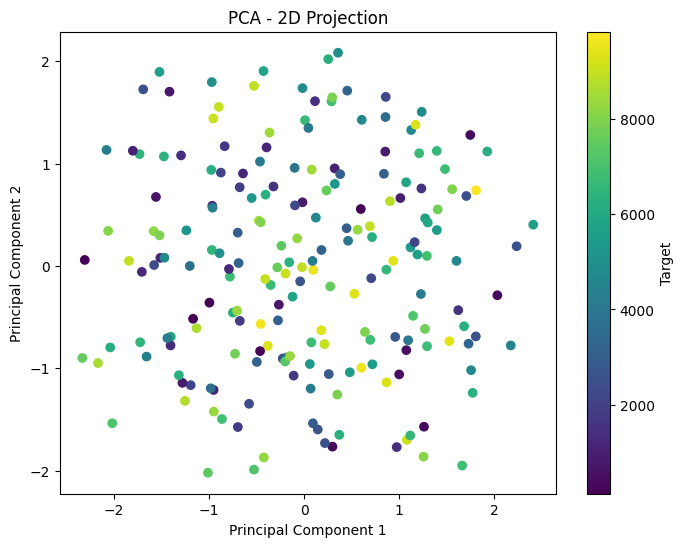

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"],pca_df["PC2"],c=data["Sales"],cmap="viridis")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.colorbar(label='Target')
plt.show()

## 3. t-SNE

t-SNE is a non-linear dimensionality reduction technique that is particularly well-suited for the visualization of high-dimensional data. It focuses on preserving the local structure of the data rather than the global structure.

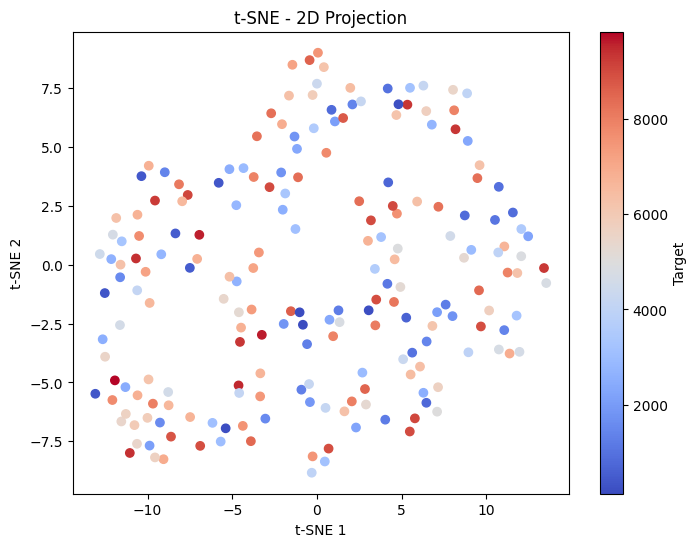

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2,random_state = 42)
tsne_data = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(tsne_data, columns=['t-SNE1', 't-SNE2'])
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], c=data['Sales'], cmap='coolwarm')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE - 2D Projection')
plt.colorbar(label='Target')
plt.show()

t-SNE is effective for visualizing clusters or patterns in high-dimensional data by projecting it into two or three dimensions.


## 4. Linear Discriminant Analysis (LDA)

LDA is both a dimensionality reduction and classification technique. It works by finding the linear combinations of features that best separate the classes.

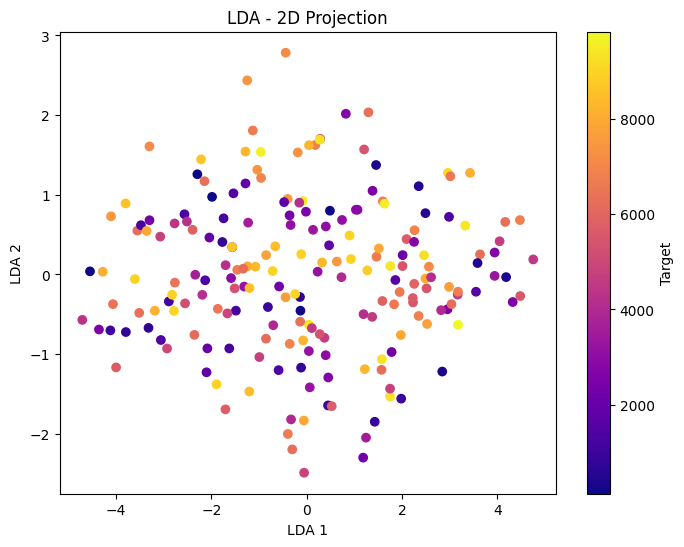

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(scaled_data, data['Sales'])

lda_df = pd.DataFrame(lda_data, columns=['LDA1', 'LDA2'])

plt.figure(figsize=(8, 6))
plt.scatter(lda_df['LDA1'], lda_df['LDA2'], c=data['Sales'], cmap='plasma')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA - 2D Projection')
plt.colorbar(label='Target')
plt.show()


## 5. Feature Importance for Dimensionality Reduction

Some machine learning algorithms provide feature importance scores, which can be used to select a subset of the most important features, effectively reducing dimensionality.

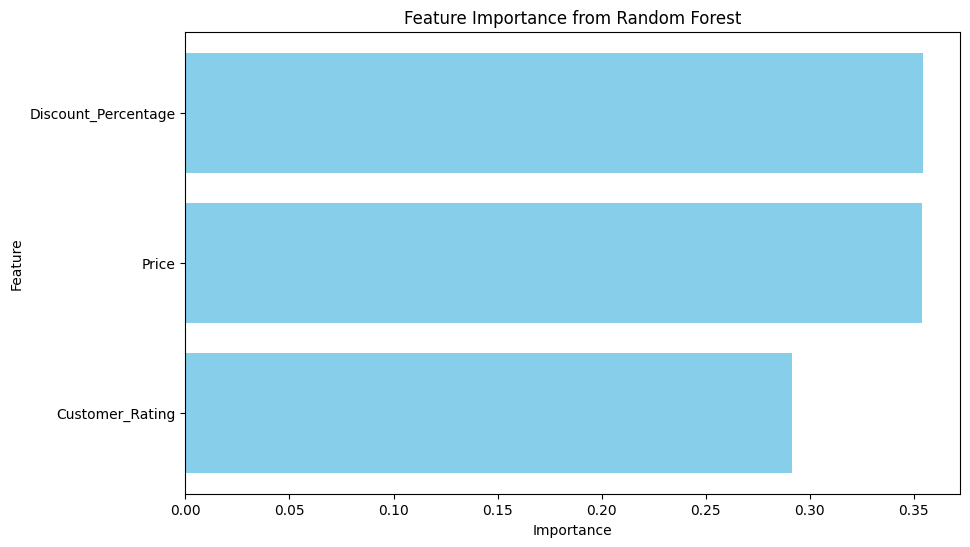

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(scaled_data, data['Sales'])

importances = rf.feature_importances_
feature_names = data.columns.drop('Sales')

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


Feature importance from tree-based models such as random forests can help in selecting only the most relevant features.